# Student Performance Prediction

The goal is to provide actionable insights that can inform Schools, teachers and policy makers to plan and design their programs to boost student performance through guidance and mentoring. This understanding could be useful for tutors, care takers, educators and parents as well to improve academic outcomes effectively.

###### Key features considered include:
1. Student attendance and hours spent on study.
2. Social and Extra curricular activities.
3. Parental and Peer Influence.
4. Access to resources and Internet availability.

###### The project follows a structured ML pipeline, including:
1. Data Acquisition and Preparation
2. Exploratory Data Analysis
3. Data Preprocessing & Feature Engineering
4. Modeling
5. Best Model Evaluation
6. Conclusion
7. Save model
   
The results of this study can help schools and policy makers understand the strongest predictors of student academic performance, potentially guiding students in right direction and build better future.

Project Contributors
This project was developed by:

Sarath Pericharla
Student Enrolled into "Professional Certificate in Machine Learning and Artificial Intelligence" Course at UC-Berkely 

It was completed under the supervision of Professor Viviana Márquez.

In [495]:
#Pandas, Numpy & Time
import pandas as pd
import numpy as np
from datetime import datetime
import time
import warnings
warnings.filterwarnings("ignore")

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import kaleido

#Model Selection, Model Training & Hyper Parameter Tuning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold

# 1. Data Acquisition and Preparation

##### a. Load the data from csv format file.
##### b. Information of the data frame
##### c. Find missing Data
##### d. Handle missing data through imputation using the mode of the column data.
##### e. Descriptive statistics of numerical features
##### f. Eliminate Gender column to avoid biased patterns

###### a. Load the data from csv format file

In [496]:
## Read the data from CSV
stu_perf = pd.read_csv('data/student_performance_data.csv')
stu_perf.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Grade
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,2
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,2
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,3
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,3
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,3


###### Data Dictionary

###### Hours_Studied:               Number of hours spent studying per week.
###### Attendance:	                Percentage of classes attended.
###### Parental_Involvement:	    Level of parental involvement in the student's education (Low, Medium, High).
###### Access_to_Resources:	        Availability of educational resources (Low, Medium, High).
###### Extracurricular_Activities:	Participation in extracurricular activities (Yes, No).
###### Sleep_Hours: 	            Average number of hours of sleep per night.
###### Previous_Scores: 	        Scores from previous exams.
###### Motivation_Level:	        Student's level of motivation (Low, Medium, High).
###### Internet_Access:	            Availability of internet access (Yes, No).
###### Tutoring_Sessions:	        Number of tutoring sessions attended per month.
###### Family_Income:	            Family income level (Low, Medium, High).
###### Teacher_Quality:	            Quality of the teachers (Low, Medium, High).
###### School_Type:	                Type of school attended (Public, Private).
###### Peer_Influence:	            Influence of peers on academic performance (Positive, Neutral, Negative).
###### Physical_Activity:	        Average number of hours of physical activity per week.
###### Learning_Disabilities:	    Presence of learning disabilities (Yes, No).
###### Parental_Education_Level:	Highest education level of parents (High School, College, Postgraduate).
###### Distance_from_Home:	        Distance from home to school (Near, Moderate, Far).
###### Gender:	                    Gender of the student (Male, Female).
###### Grade:	                    Grade of Student: 1 - F; 2 - D; 3 - C; 4 - B; 5 - A

In [497]:
stu_perf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [498]:
# Count of nulls in each column in the data frame
stu_perf.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Grade                          0
dtype: int64

##### ** Handle Missing Data**

In [499]:
##Teacher_Qulaity, Parental_Education_Level & Distance_from_Home have missing data.
missing_data_columns = ['Teacher_Quality','Parental_Education_Level','Distance_from_Home']

## Lets see the uniqueness of data in these columns.
for col in missing_data_columns:
    print(f"Value counts for {col}")
    print(stu_perf[col].value_counts())  

## We can fill the missing data with mode of the column 
## As we have more than 60% of the data in these columns have specific category

stu_perf['Teacher_Quality'].fillna(stu_perf['Teacher_Quality'].mode()[0], inplace=True)
stu_perf['Parental_Education_Level'].fillna(stu_perf['Parental_Education_Level'].mode()[0], inplace=True)
stu_perf['Distance_from_Home'].fillna(stu_perf['Distance_from_Home'].mode()[0], inplace=True)

stu_perf.isnull().sum()

Value counts for Teacher_Quality
Teacher_Quality
Medium    3925
High      1947
Low        657
Name: count, dtype: int64
Value counts for Parental_Education_Level
Parental_Education_Level
High School     3223
College         1989
Postgraduate    1305
Name: count, dtype: int64
Value counts for Distance_from_Home
Distance_from_Home
Near        3884
Moderate    1998
Far          658
Name: count, dtype: int64


Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Grade                         0
dtype: int64

In [500]:
# Discriptive statistics of Numerical features

print("Statistics of numerical features:")
stu_perf.describe()

Statistics of numerical features:


,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Grade
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,2.246254
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,0.483820
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,1.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,2.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,2.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,2.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,5.000000


##### We want to prevent the model from learning potentially biased patterns or making unfair assumptions about student grades based on gender. This ensures that predictions remain fair and equitable for all students

In [501]:
# Drop Gender column from DataFrame
to_drop = ['Gender']
stu_perf = stu_perf.drop(to_drop, axis=1)

# 2. Exploratory Data Analysis

##### 1. Heat Map to display the correlation between numerical features
##### 2. Pie Charts to display data distrubution of categorical features
##### 3. Count Plots to display the categorical features with target variable Grade
##### 4. Box Plots to display numerical data distribution with target variable Grade

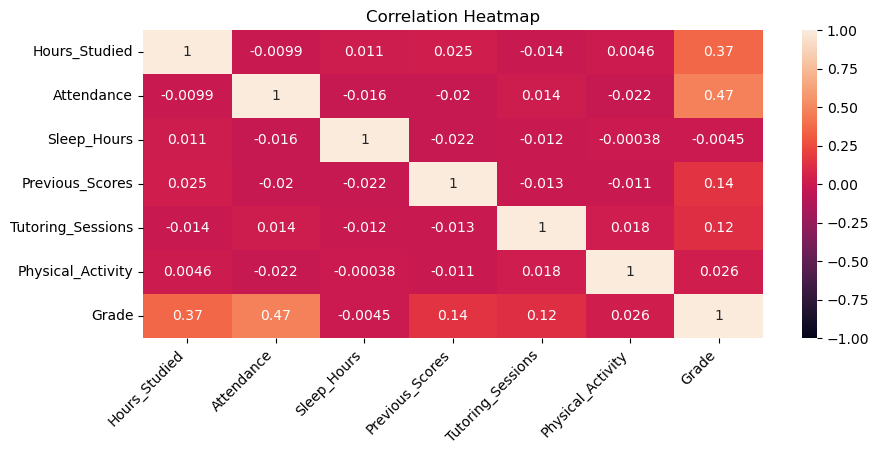

In [502]:
# Select only numerical columns
stu_perf_numeric = stu_perf.select_dtypes(include=['float64', 'int64'])

# Create a correlation heatmap for the numerical features

plt.figure(figsize=(10, 4))
sns.heatmap(stu_perf_numeric.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.savefig('images/Correlation_HeatMap.png')
plt.show()

In [503]:
# Select only numerical variables
numerical_columns = stu_perf.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = stu_perf.select_dtypes(include=['object']).columns

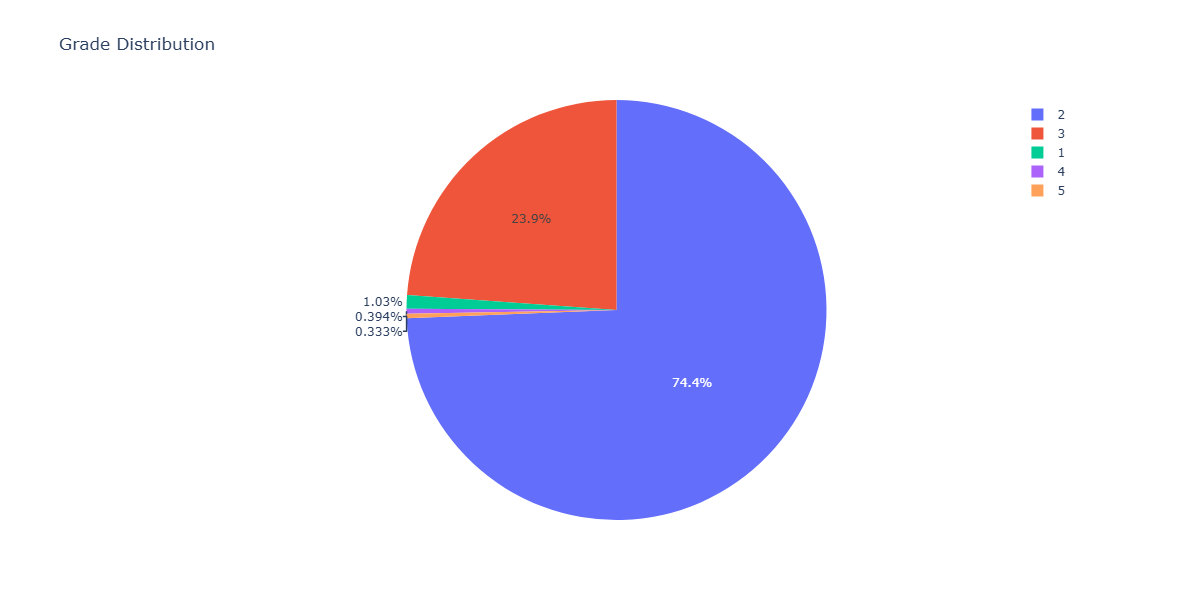

In [504]:
fig = px.pie(stu_perf, names='Grade', title="Grade Distribution")
fig.update_layout(width=800, height=600)
fig.show()

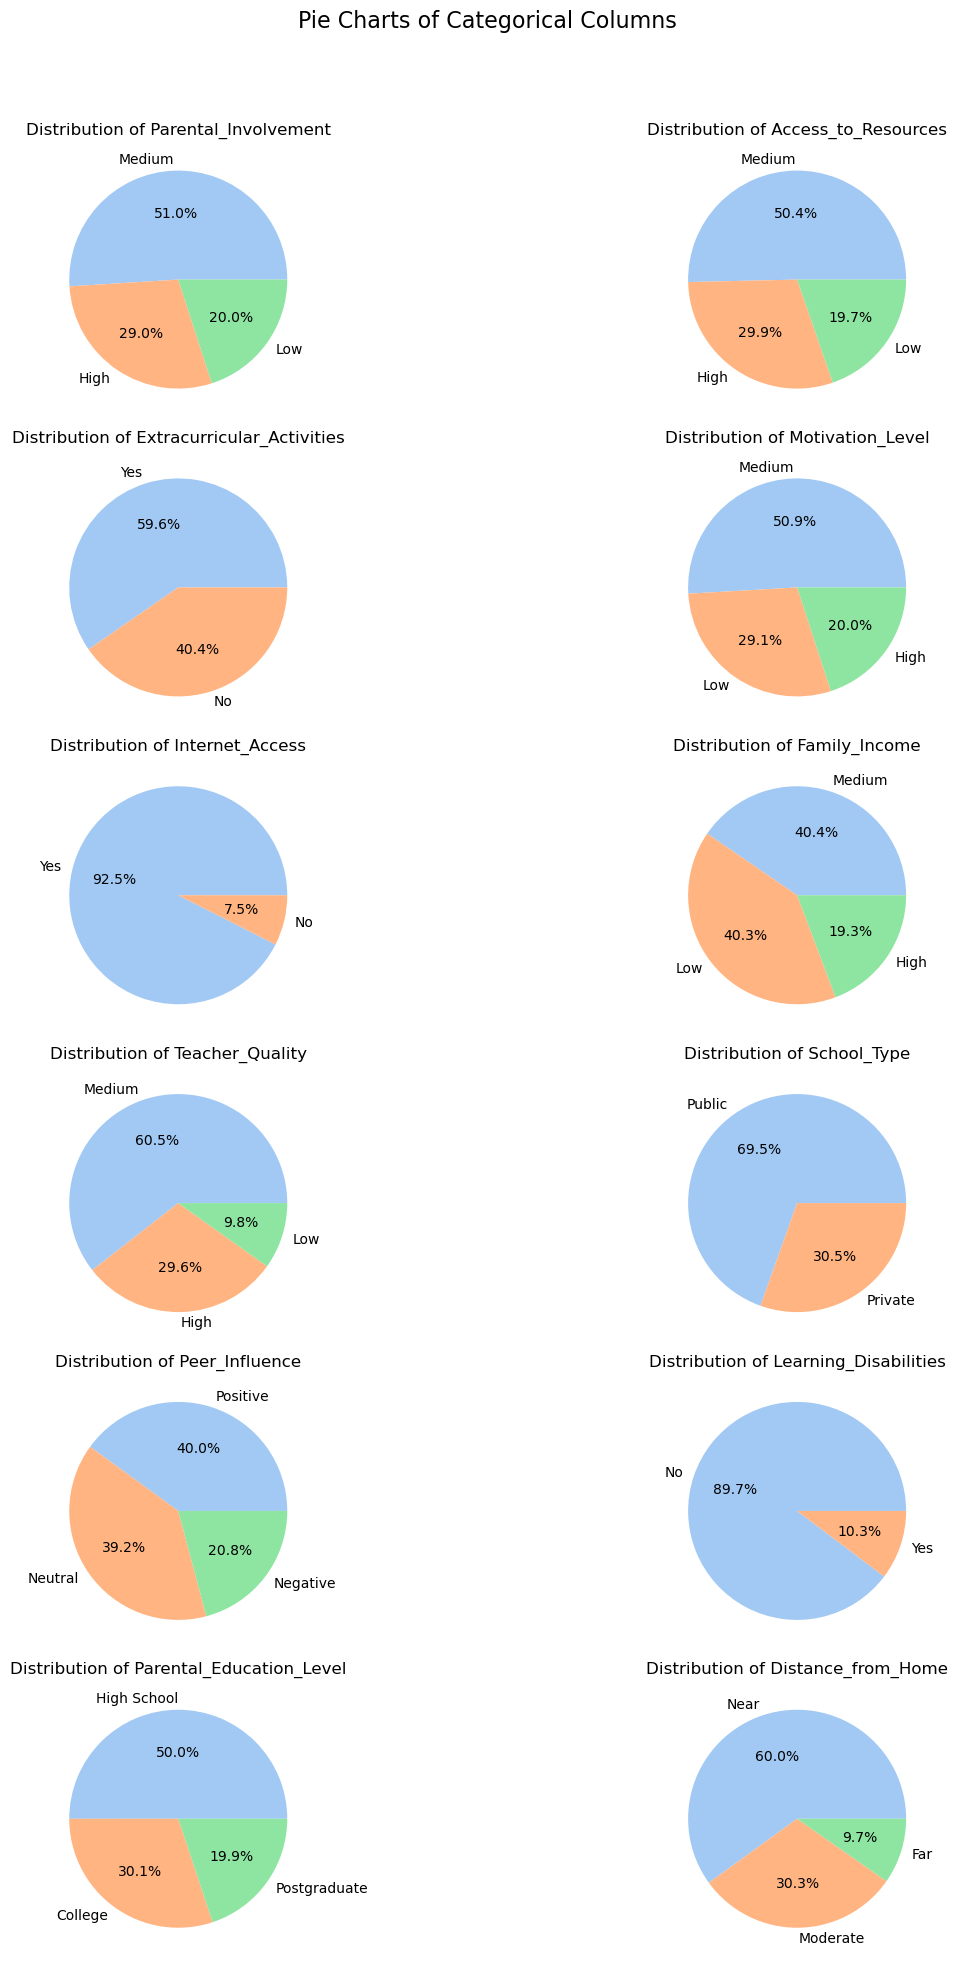

In [505]:
## Filter Grade 2 & 3 and look into the data ditribution
stu_perf_grades_2and3 = stu_perf.query("Grade in [2,3]")

# Create subplots (2 rows, 2 columns)
fig, axes = plt.subplots(6, 2, figsize=(15, 20))
fig.suptitle("Pie Charts of Categorical Columns", fontsize=16)

# Loop through categorical columns & plot pie charts
for i, col in enumerate(categorical_columns):
    row, col_idx = divmod(i, 2)  # Determine subplot location
    axes[row, col_idx].pie(stu_perf_grades_2and3[col].value_counts(), labels=stu_perf_grades_2and3[col].value_counts().index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
    axes[row, col_idx].set_title(f"Distribution of {col}")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Avoid overlap with title
plt.savefig('images/Pie_Charts_of_Categorical_Columns.png')
plt.show()

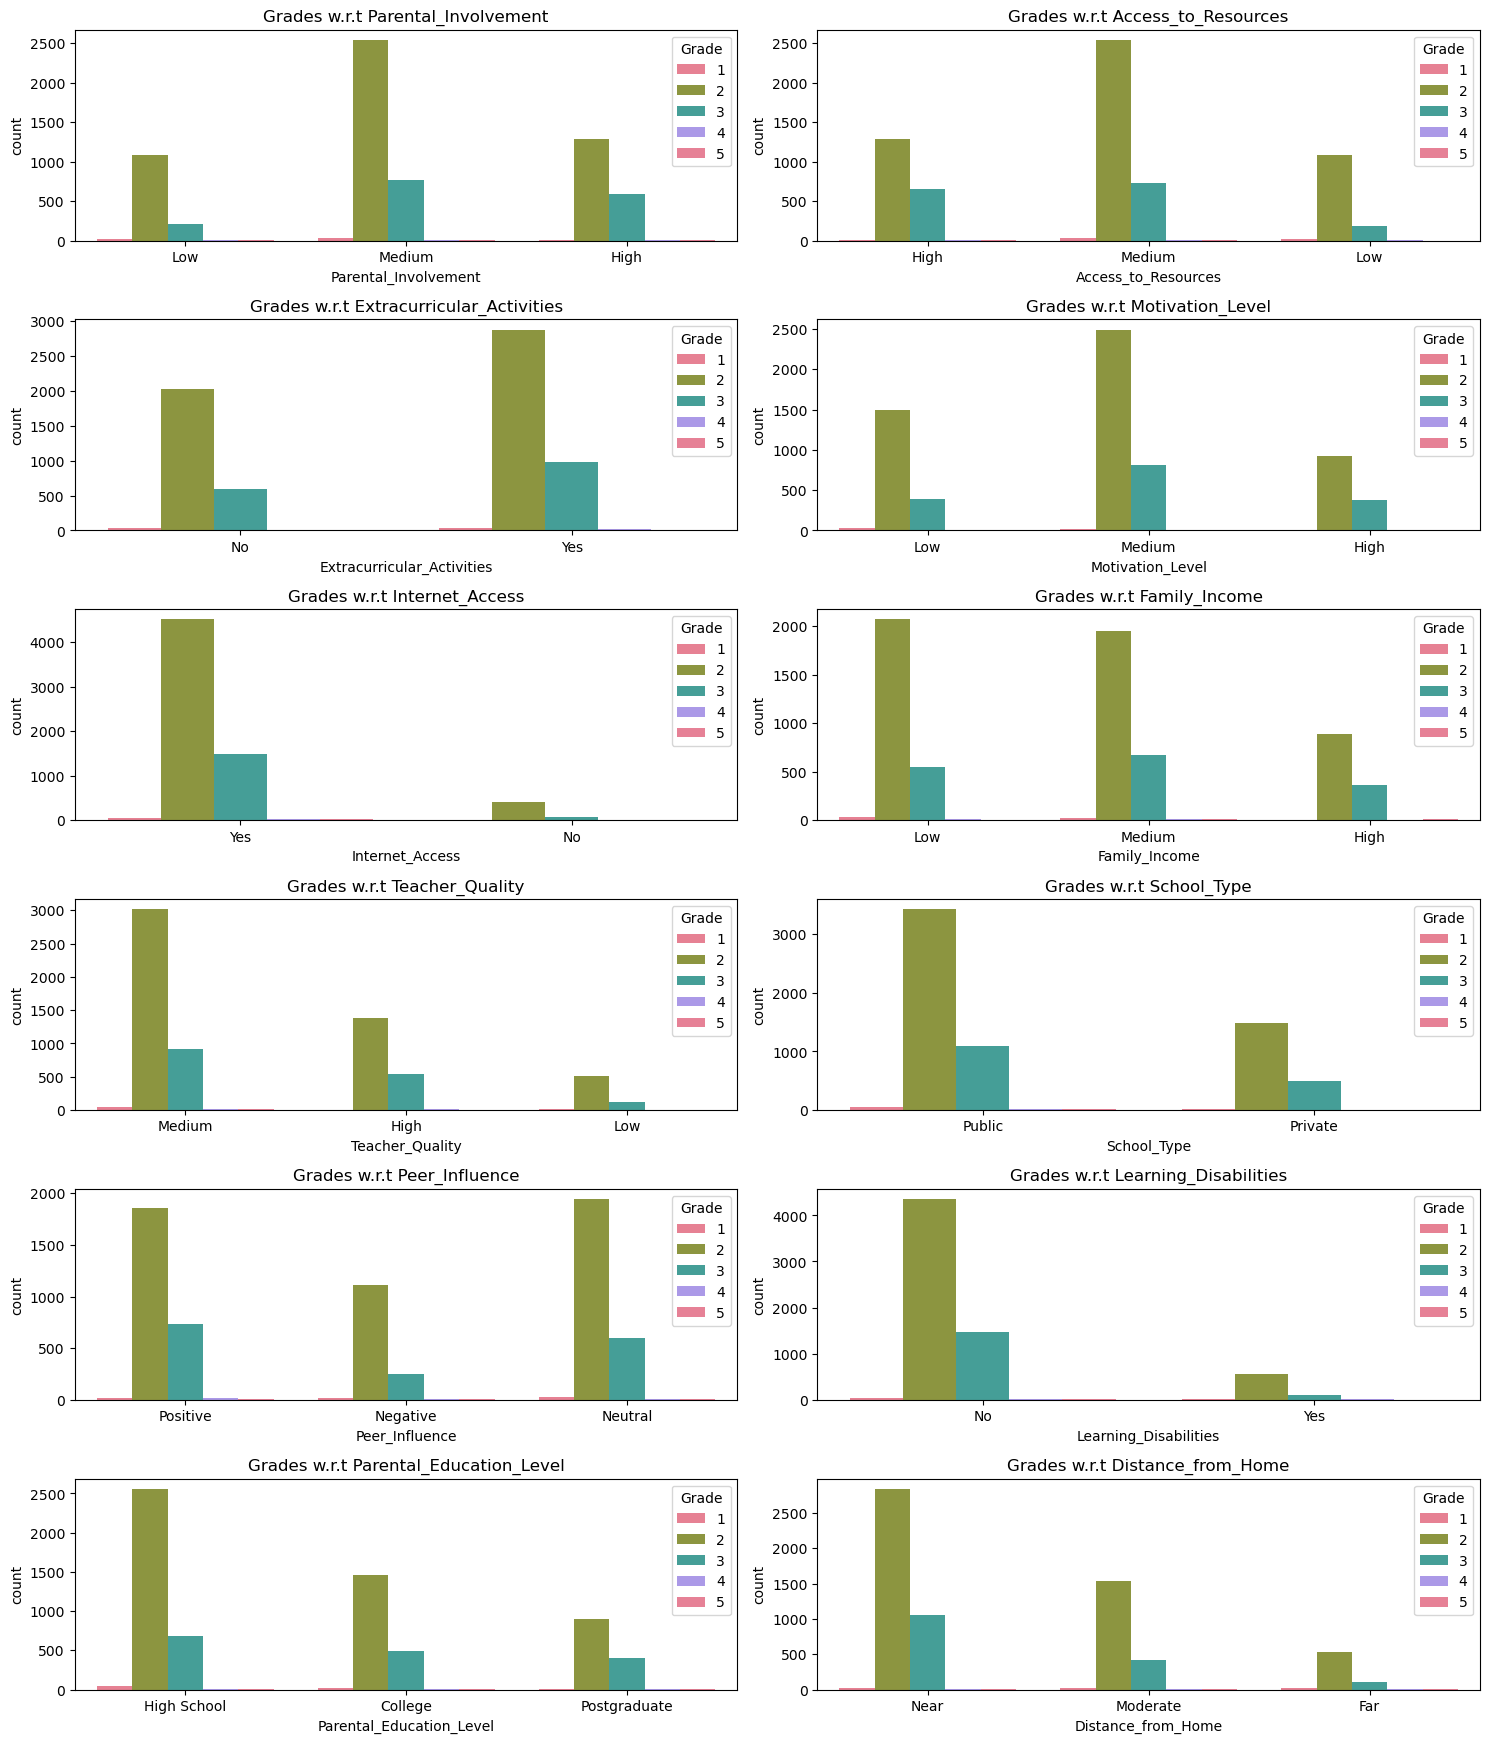

In [506]:
# Select only numerical variables
numerical_columns = stu_perf.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = stu_perf.select_dtypes(include=['object']).columns

rows = int(len(categorical_columns)/2) + 1
cols = 2
plt.figure(figsize=(15, 20))

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(rows,cols,i)
    plt.title(f"Grades w.r.t {col}")
    sns.countplot(data=stu_perf, x=stu_perf[col],hue=stu_perf['Grade'], palette='husl')

plt.tight_layout()
plt.savefig('images/Bar_Charts_of_Categorical_Columns_with_Grade.png')
plt.show()

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity'],
      dtype='object')


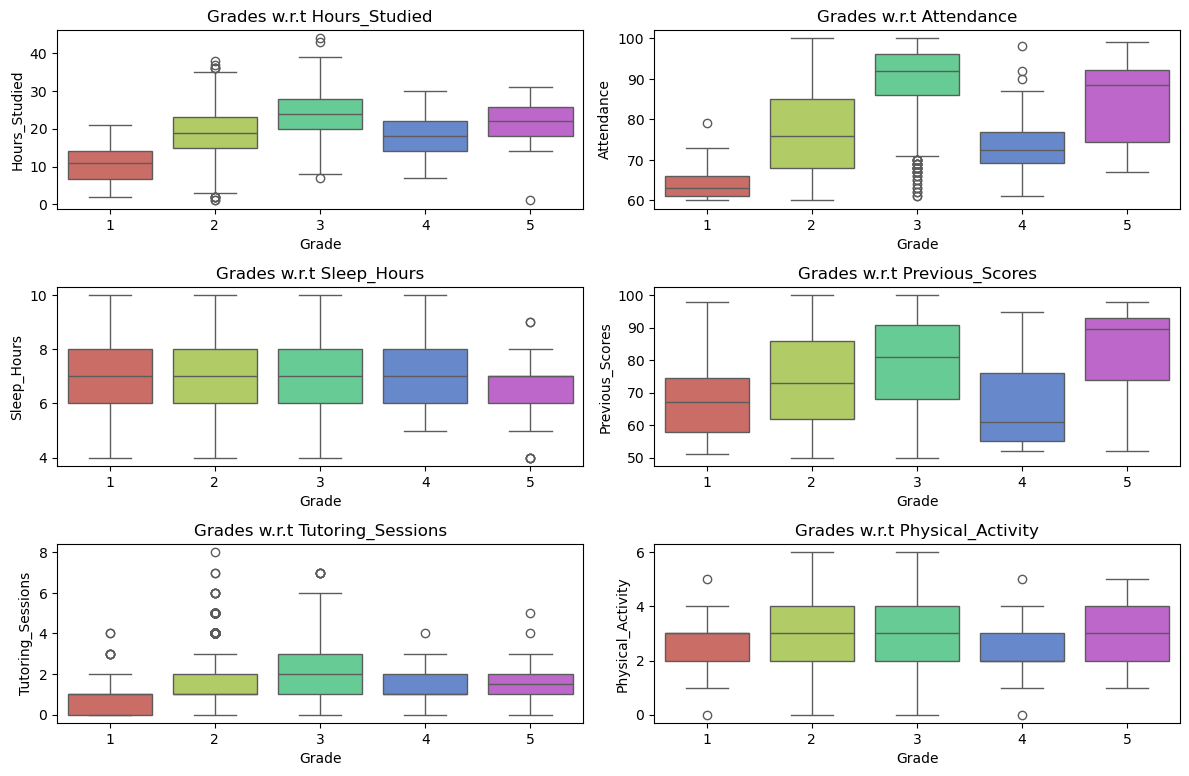

In [507]:
# Select only numerical variables
columns = stu_perf.select_dtypes(include=['float64', 'int64']).columns.drop("Grade")
print(columns)

rows = int(len(columns)/2) + 1
cols = 2
plt.figure(figsize=(12, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(rows,cols,i)
    plt.title(f"Grades w.r.t {col}")
    sns.boxplot(data=stu_perf, y=stu_perf[col],x=stu_perf['Grade'], palette='hls')

plt.tight_layout()
plt.savefig('images/Box_Charts_of_Numericsl_Columns_with_Grade.png')
plt.show()

##### EDA Observations
1. From the correlation matrix,
Features Hours_Studied and Attendance are tightly correlated with Grade. Increase in these values will have positive effect on the grade.

    Tutoring_Sessions and Previous_Scores have moderate correlation with Grade. Increase in these values will have slight  effect to get better grades.

    Sleep_Hours & Physical_Activity does not seem to have effect on the Grade.

2. From Pie Charts,
98% of the students have fallen under Grade 2 & Grade 3. The data is highly biased towards these grades, which means the test data may have less accuracy for higher grades.

3. From the above bar and box plots,
We see variance in data with Tutoring_Sessions, Previous_Scores, Hours_Studied, Attendance btween different grades.
Rest of the features have minimal variance w.r.t target variable.

4. Tutoring_Sessions, Previous_Scores, Hours_Studied, Attendance seems to be the important features in Grade classification.

# 3. Data Preprocessing & Feature Engineering
##### 1. Split the data into train and test sets
##### 2. Preprocess the training and test data
##### 3. Use encoding techniques to handle Ordinal and Nominal categorical data

In [508]:
X = stu_perf.drop(columns=['Grade']) 
y = stu_perf['Grade']
y = y - np.min(y)

In [509]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [510]:
print(f"Training set size: {X_train.shape}. Training labels size: {y_train.shape}")
print(f"Test set size: {X_test.shape}. Test labels size: {y_test.shape}")

Training set size: (5285, 18). Training labels size: (5285,)
Test set size: (1322, 18). Test labels size: (1322,)


In [511]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [512]:
categorical_columns = stu_perf.select_dtypes(include=['object']).columns
value_counts = {col: stu_perf[col].value_counts() for col in categorical_columns}
print(value_counts)

{'Parental_Involvement': Parental_Involvement
Medium    3362
High      1908
Low       1337
Name: count, dtype: int64, 'Access_to_Resources': Access_to_Resources
Medium    3319
High      1975
Low       1313
Name: count, dtype: int64, 'Extracurricular_Activities': Extracurricular_Activities
Yes    3938
No     2669
Name: count, dtype: int64, 'Motivation_Level': Motivation_Level
Medium    3351
Low       1937
High      1319
Name: count, dtype: int64, 'Internet_Access': Internet_Access
Yes    6108
No      499
Name: count, dtype: int64, 'Family_Income': Family_Income
Low       2672
Medium    2666
High      1269
Name: count, dtype: int64, 'Teacher_Quality': Teacher_Quality
Medium    4003
High      1947
Low        657
Name: count, dtype: int64, 'School_Type': School_Type
Public     4598
Private    2009
Name: count, dtype: int64, 'Peer_Influence': Peer_Influence
Positive    2638
Neutral     2592
Negative    1377
Name: count, dtype: int64, 'Learning_Disabilities': Learning_Disabilities
No     591

In [513]:
categorical_columns = ['Learning_Disabilities','School_Type','Internet_Access','Extracurricular_Activities']
ordinal_columns = ['Distance_from_Home','Parental_Education_Level','Peer_Influence','Teacher_Quality','Family_Income','Motivation_Level','Access_to_Resources','Parental_Involvement']
numerical_columns = X_train.select_dtypes(include=['int64']).columns

In [514]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  
        ('ord', OrdinalEncoder(), ordinal_columns),  
        ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)  
    ]
)

In [515]:
X_train.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
5810,27,79,Low,High,Yes,8,63,High,Yes,2,Low,Medium,Public,Negative,5,No,College,Moderate
1268,16,86,High,Medium,Yes,7,94,Medium,Yes,2,Low,High,Public,Neutral,3,No,High School,Moderate
414,22,87,Low,Medium,No,8,83,Low,Yes,1,Low,Medium,Public,Neutral,1,No,College,Far
4745,18,100,High,Medium,Yes,10,86,Medium,Yes,1,Medium,Medium,Public,Neutral,3,No,High School,Near
654,35,78,High,Low,Yes,10,99,Medium,Yes,1,Low,Medium,Private,Positive,2,No,High School,Near


In [516]:
X_test.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home
743,20,71,Medium,Low,No,7,87,High,Yes,1,Medium,Medium,Public,Negative,5,No,High School,Near
5551,22,71,Medium,Low,Yes,7,98,Low,Yes,2,Low,High,Public,Neutral,2,No,High School,Moderate
3442,21,91,High,Medium,Yes,6,53,High,Yes,1,Medium,Medium,Public,Positive,3,No,Postgraduate,Near
6571,12,91,Medium,Low,Yes,8,81,Low,Yes,0,Low,Low,Public,Positive,4,No,High School,Moderate
4204,21,63,Low,High,Yes,8,95,Medium,Yes,2,High,Medium,Public,Neutral,5,No,High School,Near


In [517]:
X_train_std = preprocessor.fit_transform(X_train)
X_test_std = preprocessor.transform(X_test)

In [518]:
num_cols = numerical_columns
ord_cols = ordinal_columns
cat_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns)
all_cols = list(num_cols) + list(ord_cols) + list(cat_cols)
all_cols

['Hours_Studied',
 'Attendance',
 'Sleep_Hours',
 'Previous_Scores',
 'Tutoring_Sessions',
 'Physical_Activity',
 'Distance_from_Home',
 'Parental_Education_Level',
 'Peer_Influence',
 'Teacher_Quality',
 'Family_Income',
 'Motivation_Level',
 'Access_to_Resources',
 'Parental_Involvement',
 'Learning_Disabilities_Yes',
 'School_Type_Public',
 'Internet_Access_Yes',
 'Extracurricular_Activities_Yes']

In [519]:
X_train_std_df = pd.DataFrame(X_train_std, columns=all_cols)
X_test_std_df = pd.DataFrame(X_test_std, columns=all_cols)

# 4. Modeling
1. Train and test different models. Models used for training are Decision Trees, KNeighbors, Random Forest, Support Vector Machines, XGBoost & Logistic Regression
2. Observe multiple evaluation scores from above classification alogorithms used
3. Print confusion matrices to determine False positives and Negatives during target prediction using trained models

In [520]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [521]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Logistic Rgression": LogisticRegression()
}

In [522]:
# DataFrames to store metrics & confusion matrices
results_df = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])
confusion_matrices_df = {}

# Train, Predict & Evaluate each model
for name, model in models.items():
    model.fit(X_train_std_df, y_train)
    y_pred = model.predict(X_test_std_df)

    # Compute metrics with explicit labels parameter
    metrics = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1-Score": f1_score(y_test, y_pred, average='macro')
    }

    # Append metrics to results_df
    results_df = pd.concat([results_df, pd.DataFrame([metrics])], ignore_index=True)

    # Store confusion matrix with explicit labels
    confusion_matrices_df[name] = confusion_matrix(y_test, y_pred)

# Display evaluation results
print("\nModel Performance Comparison:")
print(results_df)

# Display confusion matrices
print("\nConfusion Matrices:")
for model, matrix in confusion_matrices_df.items():
    print(f"\nConfusion Matrix for {model}:\n{matrix}")


Model Performance Comparison:
                Model  Accuracy  Precision    Recall  F1-Score
0       Decision Tree  0.834342   0.423328  0.476703  0.442569
1                 KNN  0.842663   0.334571  0.303716  0.313313
2       Random Forest  0.915280   0.368671  0.351308  0.358242
3                 SVM  0.934191   0.375063  0.365213  0.369403
4             XGBoost  0.946293   0.546095  0.462195  0.492561
5  Logistic Rgression  0.909228   0.492138  0.461658  0.475387

Confusion Matrices:

Confusion Matrix for Decision Tree:
[[  5   6   0   0   0]
 [ 10 856  89   5   3]
 [  0  95 241   3   2]
 [  0   3   1   0   0]
 [  0   1   1   0   1]]

Confusion Matrix for KNN:
[[  0  11   0   0   0]
 [  0 923  40   0   0]
 [  0 150 191   0   0]
 [  0   4   0   0   0]
 [  0   3   0   0   0]]

Confusion Matrix for Random Forest:
[[  0  11   0   0   0]
 [  0 946  17   0   0]
 [  0  77 264   0   0]
 [  0   4   0   0   0]
 [  0   1   2   0   0]]

Confusion Matrix for SVM:
[[  0  11   0   0   0]
 [  0 94

##### Observations
1. XGBoost seems to have better performance and accuracy.
2. The dataset is highly imbalanced. So, We need Precision, Recall, F1 Score as well to determine best model.
3. If we sum numbers other than diagnol values in the matrix, those are actually wrong predictions. 
4. Considering the problem, Exam grade prediction to proactively guide students for betterment, Recall and F1 Score becomes important.
    Recall because most of the grades are lower grades and we cant afford false negatives.
    F1 Score, because of the imbalance in the datasets, We dont want to miss higher grade students when predicted as lower grades.

# 5.  Model Tuning & Evaluation
##### 1. Choose multiple important hyper parameters for different models chosen
##### 2. Perform GridsearchCV on these models with chosen hyperparameters.
##### 3. Plot the evaluation metrics from different models.
##### 4. Plot the False Positivs and Negatives using confusion matrix

In [523]:
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(),
    "Logistic Regression": LogisticRegression()
}

params_grid = {
	"Decision Tree": {
		"criterion": ['gini','entropy'],
		"max_depth": [3, 5, 7, 9],
		"max_features": [1, 2, 3, 4],
		"min_samples_split": [5, 10, 15, 20]
	},
    "KNN": {
        "n_neighbors": [3,5,7,9],
        "weights": ['uniform', 'distance']
    },
    "Random Forest": {
        "n_estimators": [50, 75, 100, 125],
        "max_depth": [3,5,7,9],
        "min_samples_split": [5,10,15,20]
    },
	"SVM": {
        "kernel": ['linear', 'poly', 'rbf', 'sigmoid'],
        "C": [0.001, 0.01, 0.1, 1, 10]
    },
	"XGBoost": {
        "n_estimators": [50, 100, 150],
		"subsample": [0.3, 0.5, 0.8],
		"max_depth": [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2, 0.3]
	},
    "Logistic Regression": {
		"C": [0.01, 0.1, 1, 10], 
		"penalty": ['l1','l2'],
		"solver": ['lbfgs', 'liblinear','saga']
    }
}

In [524]:
# Initiate empty arrays and Dataframe to store results

best_models = {}
best_params = {}
results_tuned_df = pd.DataFrame(columns=["Model", "Best Params", "Best Score", "Accuracy_train", "Accuracy_test", "Precision_train", "Precision_test","Recall_train", "Recall_test", "F1-Score_train", "F1-Score_test"])
confusion_matrices_tuned_df = {}

# Loop through all the models and record the evaluation metrics into Dataframe

for name, model in models.items():
    # Apply GridSearchCV for hyperparameter tuning
    model_grid = GridSearchCV(model, param_grid=params_grid[name], cv=5, scoring='f1_macro', n_jobs=-1)
    model_grid.fit(X_train_std_df, y_train)
    
    best_models[name] = model_grid.best_estimator_
    best_params[name] = model_grid.best_params_
    
    # Make predictions
    y_train_pred = best_models[name].predict(X_train_std_df)
    y_test_pred = best_models[name].predict(X_test_std_df)
    
    # Compute metrics
    metrics = {
        "Model": name,
        "Best Params": model_grid.best_params_,
        "Best Score": model_grid.best_score_,
        "Accuracy_train": accuracy_score(y_train, y_train_pred),
        "Accuracy_test": accuracy_score(y_test, y_test_pred),
        "Precision_train": precision_score(y_train, y_train_pred, average='macro'),
        "Precision_test": precision_score(y_test, y_test_pred, average='macro'),
        "Recall_train": recall_score(y_train, y_train_pred, average='macro'),
        "Recall_test": recall_score(y_test, y_test_pred, average='macro'),
        "F1-Score_train": f1_score(y_train, y_train_pred, average='macro'),
        "F1-Score_test": f1_score(y_test, y_test_pred, average='macro')
    }
    
    results_tuned_df = pd.concat([results_tuned_df, pd.DataFrame([metrics])], ignore_index=True)

    # Store confusion matrix with explicit labels
    confusion_matrices_tuned_df[name] = confusion_matrix(y_test, y_test_pred)
    
    # Print best model
    print(f"Best Parameters for {name}: {model_grid.best_params_}")


# Display the results
print("\nModel Parameters and scores:")
results_tuned_df

Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 3, 'min_samples_split': 20}
Best Parameters for KNN: {'n_neighbors': 3, 'weights': 'distance'}
Best Parameters for Random Forest: {'max_depth': 9, 'min_samples_split': 15, 'n_estimators': 100}
Best Parameters for SVM: {'C': 10, 'kernel': 'rbf'}
Best Parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}

Model Parameters and scores:


,Model,Best Params,Best Score,Accuracy_train,Accuracy_test,Precision_train,Precision_test,Recall_train,Recall_test,F1-Score_train,F1-Score_test
0,Decision Tree,"{'criterion': 'entropy', 'max_depth': 9, 'max_...",0.354008,0.868307,0.826021,0.688718,0.314322,0.364393,0.307481,0.391516,0.310164
1,KNN,"{'n_neighbors': 3, 'weights': 'distance'}",0.348680,1.000000,0.835855,1.000000,0.324589,1.000000,0.305635,1.000000,0.312299
2,Random Forest,"{'max_depth': 9, 'min_samples_split': 15, 'n_e...",0.341492,0.931693,0.898638,0.578316,0.364799,0.363570,0.337647,0.374339,0.347517
3,SVM,"{'C': 10, 'kernel': 'rbf'}",0.464799,0.992053,0.955371,0.996219,0.525745,0.817549,0.525050,0.881647,0.525374
4,XGBoost,"{'learning_rate': 0.3, 'max_depth': 3, 'n_esti...",0.482661,0.996405,0.961422,0.998147,0.565456,0.979846,0.542791,0.988563,0.553505
5,Logistic Regression,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.465121,0.908231,0.909985,0.511324,0.498990,0.454789,0.479840,0.477102,0.488816


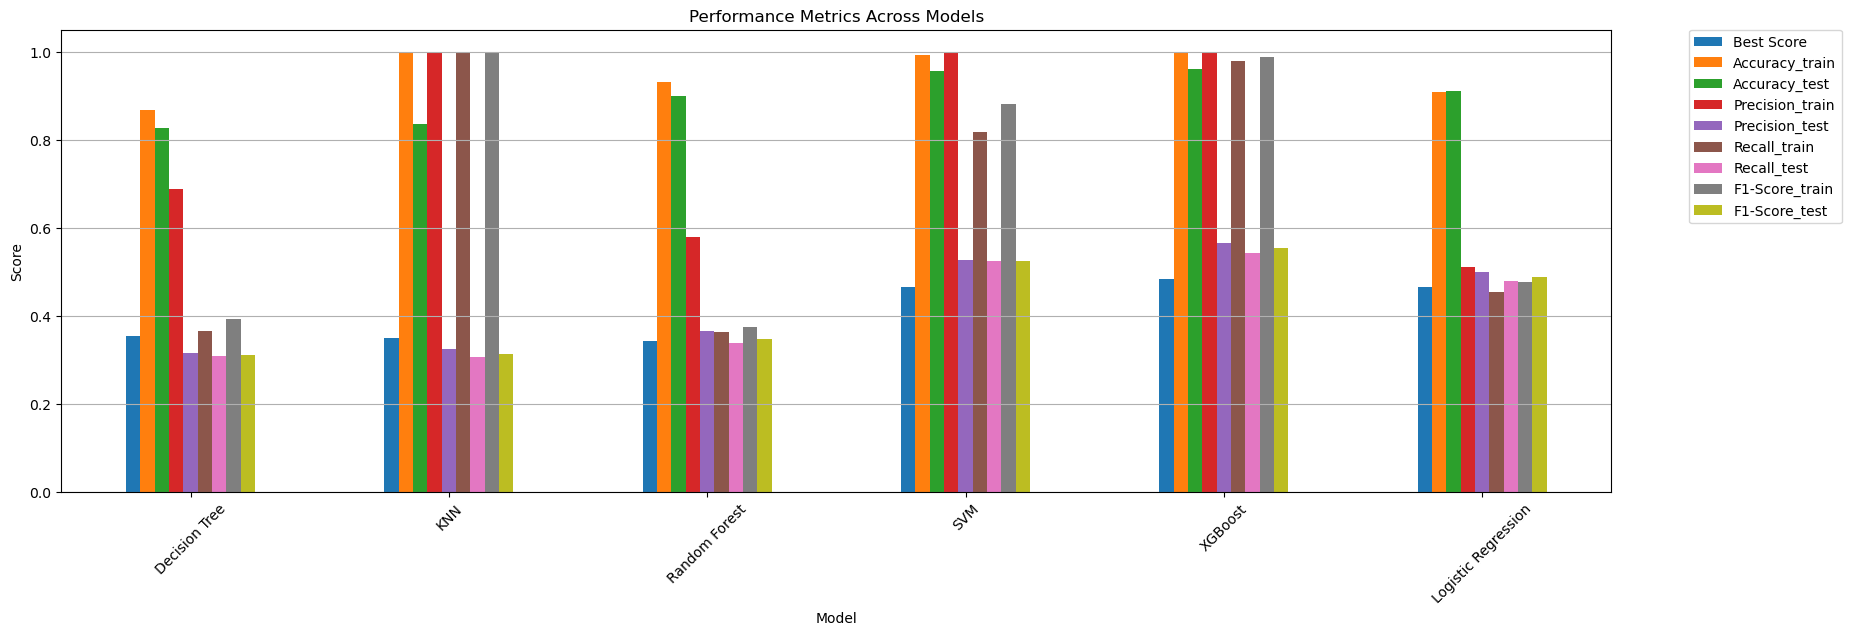

In [525]:
# Plot the evaluation metrics from above dataframe

results_tuned_df.set_index("Model").plot(kind='bar', figsize=(20, 6))
plt.title("Performance Metrics Across Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('images/Model_Evaluation_Metrics.png')
plt.show()


Confusion Matrices Heat Maps:


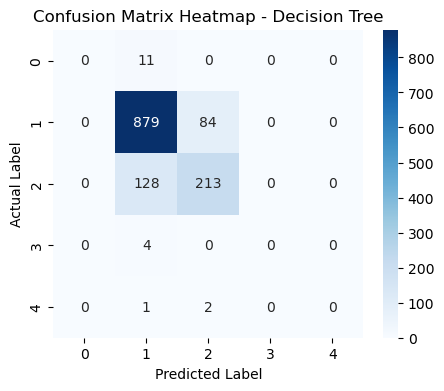

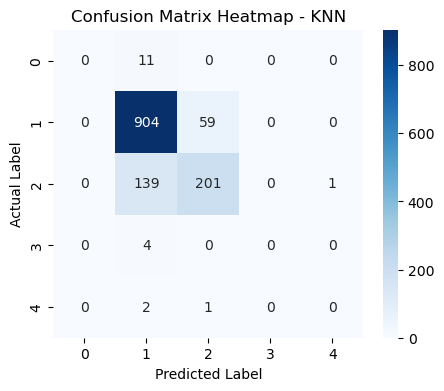

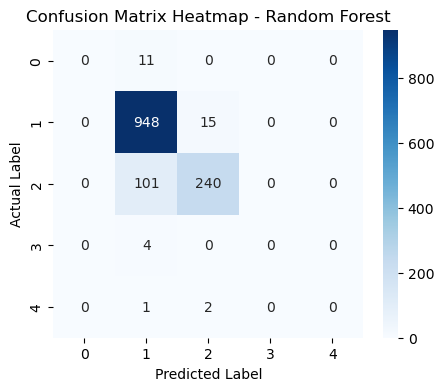

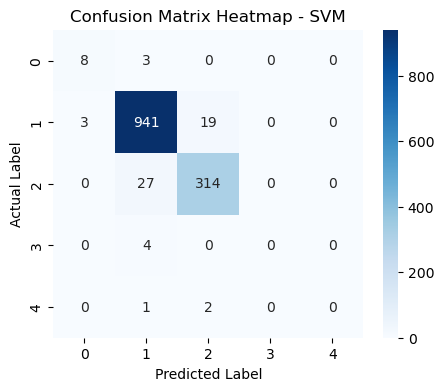

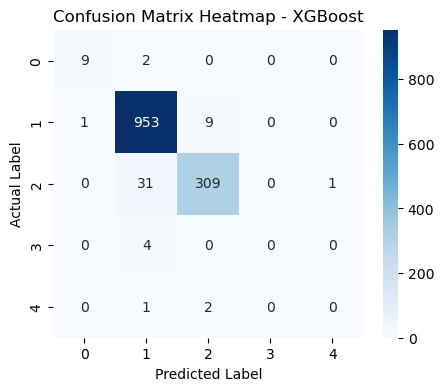

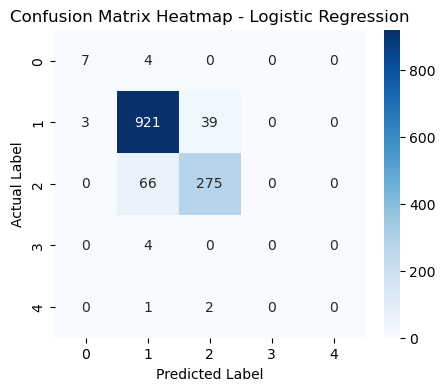

In [526]:
# Plot Confusion matrices for different algorithms.

print("\nConfusion Matrices Heat Maps:")
filename=''
for model, matrix in confusion_matrices_tuned_df.items():
    plt.figure(figsize=(5,4))
    filename = f'{model}_Confusion_Matrix.png'
    # Use the individual matrix instead of the entire dictionary
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['0', '1','2','3','4'], 
                yticklabels=['0', '1','2','3','4'])
    plt.xlabel("Predicted Label")
    plt.ylabel("Actual Label")
    plt.title(f"Confusion Matrix Heatmap - {model}")
    plt.savefig('images/' + filename)
    plt.show()

#### Key Points from Tuning and Evaluation
###### 1. In this problem.
False Positive: Students with higher grades are classified into lower grades, which is okay as they can receive guidance.
False Negative: Students with lower grades are classified into higher grades, which is NOT okay as they miss the guidance needed for better academic scores.
###### 2. We need to rank our models based on evaluation metric which minimizes False Negatives and also have balance with False Negatives and Positives.
###### 3. XGBoost seems to be the best model for this classification problem.
###### 4. XGBoost has better Recall and F1 Score, which is the intent due to imbalanced dataset.

# 6.Best Model Validation

###### a. Perform KFold cross validation with best model
###### b. Take observation of the prediction scores for classification with this best model.
###### c. Obtain Feature importance for the best model which helps us make decisions.

In [527]:
kcv = KFold(n_splits=5, shuffle=True, random_state=42)
selected_model = XGBClassifier(learning_rate = 0.3, max_depth = 3, n_estimators = 150, subsample = 0.8)

kcv_train = cross_val_score(selected_model, X_train_std_df, y_train, scoring="f1_macro", cv=kcv)

selected_model.fit(X_train_std_df, y_train)
y_pred = selected_model.predict(X_test_std_df)
    
Model_Results = {
        "Model": "XGBoost",
        "Accuracy": np.mean(accuracy_score(y_test, y_pred)),
        "Precision": np.mean(precision_score(y_test, y_pred, average='macro')),
        "Recall": np.mean(recall_score(y_test, y_pred, average='macro')),
        "F1-Score": np.mean(f1_score(y_test, y_pred, average='macro'))
    }
    
Model_Results_df = pd.DataFrame([Model_Results])
Model_Results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,XGBoost,0.961422,0.565456,0.542791,0.553505


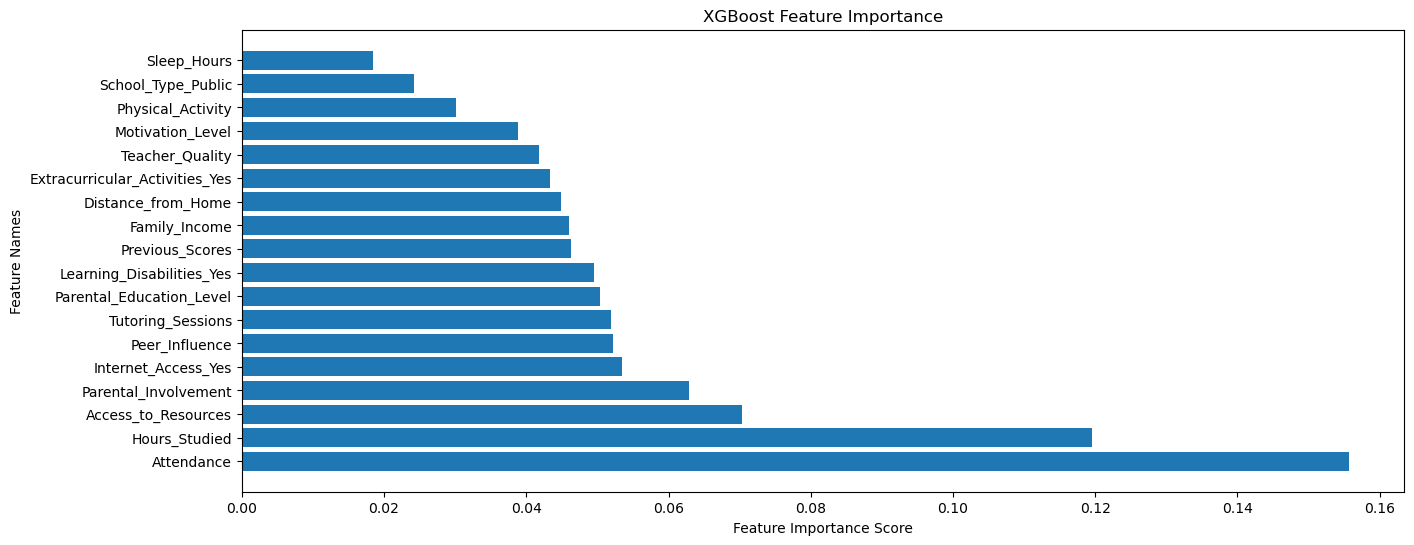

In [528]:
features=X_train_std_df.columns
feature_imp = selected_model.feature_importances_

feature_importance_df = pd.DataFrame({"Feature": features, "Importance": feature_imp}).sort_values(by="Importance", ascending=False)

#feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(15, 6))
plt.barh(y=feature_importance_df["Feature"], width=feature_importance_df["Importance"])
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature Names")
plt.title("XGBoost Feature Importance")
plt.savefig("XGBoost_Feature_importance")
plt.show()

#### Key Points from Model Evaluation

###### 1. XGBoost has been validated and has performed well with good Accuracy, Recall & F1 Scores.
###### 2. Attendance, Hours_Studied, Access_to_Resources, Parental_Involvement, Internet Access seems to be top 5 Important features.
###### 3. From personal experience as student, the important features given by the model seems obvious in improving better academic peformance.

# 7. Conclusion

#### 1. Takeaways
#### 2. Recommendations
#### 3. Future Scope

##### Takeaways

1. Students attendance to school and their hours of study are major factors in getting good grades.
2. Access to proper resources is important for students academic success.
3. Positive peer Influence, Parental Involvement and their education background have positive effect on sudents performance.
4. There are few indirect factors as well that can add value at student personal level. Eg: Physical activity & Motivational level etc..

##### Recommendations

###### Schools:
1. Encourage students to maintain high attendance to classes.
2. Design awareness programs to increse hours of study away from school.
3. Help students involve more in Physical and Extra curricular activities as part of personal development. 

###### Policy makers:
1. Necessary resources should be made available for all students at schools to improve their studies.
2. Design assitance and relief programs to provide internet services for students with low family income.

###### Teachers & Educators:

1. Identify students with poor grade prediction than previousscores and schedule Interactive sessions.
2. Proactively engage with students and provide guidance to boost their motivation level to create academic success.

##### Future Scope

1. Information related to social interactions can provide deeper insights.
2. Features with students interests can provide deeper understanding and guide them in specific areas.
3. Future plans to pursue college education and specific career interests can provide mentors to guide them accordingly.

# 8. Save the Model

In [529]:
import pickle
import joblib

preprocessor_filename = "preprocessor.pkl"
with open(preprocessor_filename, "wb") as file:
    pickle.dump(preprocessor, file)

# Save the trained model to a file so it can be used later for predictions
model_filename = "Student_Performance_xgboost.pkl"
with open(model_filename, "wb") as file:
    pickle.dump(best_model, file)

print("Saved successfully!")

Saved successfully!
